Analyze timeline data, 2016-2019

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
from pathlib import Path
import numpy as np

# File locations
combined = "Resources/combined_df.csv"

# Reading the data
combined_data = pd.read_csv(combined)

In [2]:
combined_data.head()

,Unnamed: 0,age,original_gender,gender,country,num_employees,employer_discuss_mh,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,request_med_leave,age groups,year,individual
0,0,39.0,Male,male,United Kingdom,26-100,No,Yes,No,Maybe,Maybe,Very easy,35-44,2016,1
1,1,29.0,male,male,United States of America,6-25,Yes,Yes,Yes,Maybe,No,Somewhat easy,25-34,2016,2
2,2,38.0,Male,male,United Kingdom,6-25,No,Maybe,No,Yes,Yes,Neither easy nor difficult,35-44,2016,3
3,3,43.0,male,male,United Kingdom,No Response,No Response,Yes,Yes,Yes,Maybe,No Response,35-44,2016,4
4,4,43.0,Female,female,United States of America,6-25,No,Yes,Yes,Maybe,No,Neither easy nor difficult,35-44,2016,5


In [3]:
combined_data = combined_data.fillna(
    {       
        "gender": 'No Response',
            }
)
#combined_data.count()

In [4]:
combined_data['request_med_leave'].unique()

array(['Very easy', 'Somewhat easy', 'Neither easy nor difficult',
       'No Response', 'Very difficult', 'Somewhat difficult',
       "I don't know", 'Difficult'], dtype=object)

In [5]:
#df_2016['request_med_leave'].unique()

In [6]:
#df_2017['request_med_leave'].unique()

In [7]:
#df_2018['request_med_leave'].unique()

In [8]:
#df_2019['request_med_leave'].unique()

In [9]:
# Set up df for each year
df_2016 = combined_data.loc[combined_data['year'] == 2016]
df_2017 = combined_data.loc[combined_data['year'] == 2017]
df_2018 = combined_data.loc[combined_data['year'] == 2018]
df_2019 = combined_data.loc[combined_data['year'] == 2019]

In [10]:
print(combined_data['bring_up_phys_issue_in_interview'].unique())
print(combined_data['bring_up_mh_issue_in_interview'].unique())
print(combined_data['request_med_leave'].unique())

['Maybe' 'Yes' 'No']
['Maybe' 'No' 'Yes']
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' 'No Response'
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']


In [11]:
# Get counts for overall time chart
total_ids = len(combined_data)

all_yes_phy_issue = combined_data[(combined_data['bring_up_phys_issue_in_interview'] == 'Yes')].count()['individual']
pct_yes_phy_issue = round(all_yes_phy_issue / total_ids * 100, 2)
print(pct_yes_phy_issue)

all_maybe_phy_issue = combined_data[(combined_data['bring_up_phys_issue_in_interview'] == 'Maybe')].count()['individual']
pct_maybe_phy_issue = round(all_maybe_phy_issue / total_ids * 100, 2)
print(pct_maybe_phy_issue)

all_no_phy_issue = combined_data[(combined_data['bring_up_phys_issue_in_interview'] == 'No')].count()['individual']
pct_no_phy_issue = round(all_no_phy_issue / total_ids * 100, 2)
print(pct_no_phy_issue)


23.59
42.78
33.63


In [12]:
all_yes_mh_issue = combined_data[(combined_data['bring_up_mh_issue_in_interview'] == 'Yes')].count()['individual']
pct_yes_mh_issue = round(all_yes_mh_issue / total_ids * 100, 2)
print(pct_yes_mh_issue)

all_maybe_mh_issue = combined_data[(combined_data['bring_up_mh_issue_in_interview'] == 'Maybe')].count()['individual']
pct_maybe_mh_issue = round(all_maybe_mh_issue / total_ids * 100, 2)
print(pct_maybe_mh_issue)

all_no_mh_issue = combined_data[(combined_data['bring_up_mh_issue_in_interview'] == 'No')].count()['individual']
pct_no_mh_issue = round(all_no_mh_issue / total_ids * 100, 2)
print(pct_no_mh_issue)


6.27
28.03
65.69


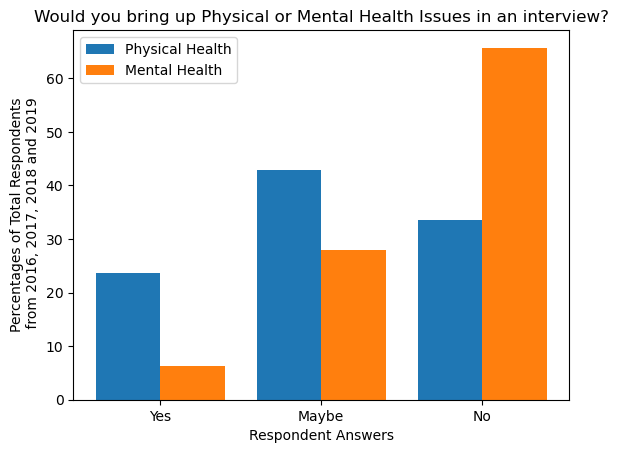

In [13]:
mh_total = [pct_yes_mh_issue, pct_maybe_mh_issue, pct_no_mh_issue]
ph_total = [pct_yes_phy_issue, pct_maybe_phy_issue, pct_no_phy_issue]
answers = ['Yes', 'Maybe', 'No']
x_axis = np.arange(len(answers))

plt.bar(x_axis - 0.2, ph_total, 0.4, label = 'Physical Health') 
plt.bar(x_axis + 0.2, mh_total, 0.4, label = 'Mental Health') 

plt.xticks(x_axis, answers) 
plt.title("Would you bring up Physical or Mental Health Issues in an interview?")
plt.xlabel("Respondent Answers")
plt.ylabel("Percentages of Total Respondents\n from 2016, 2017, 2018 and 2019")
plt.legend()

# Save an image of the chart in Resources
plt.savefig("Figures/ph_v_mh_total_bar.png")

plt.show()


In [14]:
total_ids_2016 = len(df_2016)
print(total_ids_2016)

yes_phy_2016 = df_2016[(df_2016['bring_up_phys_issue_in_interview'] == 'Yes')].count()['individual']
pct_yes_phy_2016 = round(yes_phy_2016 / total_ids_2016 * 100, 2)
print(pct_yes_phy_2016)

maybe_phy_2016 = df_2016[(df_2016['bring_up_phys_issue_in_interview'] == 'Maybe')].count()['individual']
pct_maybe_phy_2016 = round(maybe_phy_2016 / total_ids_2016 * 100, 2)
print(pct_maybe_phy_2016)

no_phy_2016 = df_2016[(df_2016['bring_up_phys_issue_in_interview'] == 'No')].count()['individual']
pct_no_phy_2016 = round(no_phy_2016 / total_ids_2016 * 100, 2)
print(pct_no_phy_2016)

1428
24.93
44.19
30.88


In [15]:
total_ids_2017 = len(df_2017)
print(total_ids_2017)

yes_phy_2017 = df_2017[(df_2017['bring_up_phys_issue_in_interview'] == 'Yes')].count()['individual']
pct_yes_phy_2017 = round(yes_phy_2017 / total_ids_2017 * 100, 2)
print(pct_yes_phy_2017)

maybe_phy_2017 = df_2017[(df_2017['bring_up_phys_issue_in_interview'] == 'Maybe')].count()['individual']
pct_maybe_phy_2017 = round(maybe_phy_2017 / total_ids_2017 * 100, 2)
print(pct_maybe_phy_2017)

no_phy_2017 = df_2017[(df_2017['bring_up_phys_issue_in_interview'] == 'No')].count()['individual']
pct_no_phy_2017 = round(no_phy_2017 / total_ids_2017 * 100, 2)
print(pct_no_phy_2017)

754
23.21
40.05
36.74


In [16]:
total_ids_2018 = len(df_2018)
print(total_ids_2018)

yes_phy_2018 = df_2018[(df_2018['bring_up_phys_issue_in_interview'] == 'Yes')].count()['individual']
pct_yes_phy_2018 = round(yes_phy_2018 / total_ids_2018 * 100, 2)
print(pct_yes_phy_2018)

maybe_phy_2018 = df_2018[(df_2018['bring_up_phys_issue_in_interview'] == 'Maybe')].count()['individual']
pct_maybe_phy_2018 = round(maybe_phy_2018 / total_ids_2018 * 100, 2)
print(pct_maybe_phy_2018)

no_phy_2018 = df_2018[(df_2018['bring_up_phys_issue_in_interview'] == 'No')].count()['individual']
pct_no_phy_2018 = round(no_phy_2018 / total_ids_2018 * 100, 2)
print(pct_no_phy_2018)

417
18.94
42.45
38.61


In [17]:
total_ids_2019 = len(df_2019)
print(total_ids_2019)

yes_phy_2019 = df_2019[(df_2019['bring_up_phys_issue_in_interview'] == 'Yes')].count()['individual']
pct_yes_phy_2019 = round(yes_phy_2019 / total_ids_2019 * 100, 2)
print(pct_yes_phy_2019)

maybe_phy_2019 = df_2019[(df_2019['bring_up_phys_issue_in_interview'] == 'Maybe')].count()['individual']
pct_maybe_phy_2019 = round(maybe_phy_2019 / total_ids_2019 * 100, 2)
print(pct_maybe_phy_2019)

no_phy_2019 = df_2019[(df_2019['bring_up_phys_issue_in_interview'] == 'No')].count()['individual']
pct_no_phy_2019 = round(no_phy_2019 / total_ids_2019 * 100, 2)
print(pct_no_phy_2019)

351
24.5
43.3
32.19


In [18]:
combined_data['request_med_leave'].unique()

array(['Very easy', 'Somewhat easy', 'Neither easy nor difficult',
       'No Response', 'Very difficult', 'Somewhat difficult',
       "I don't know", 'Difficult'], dtype=object)

In [19]:
combined_data['request_med_leave'].value_counts()

request_med_leave
Somewhat easy                 635
Very easy                     505
No Response                   501
I don't know                  378
Somewhat difficult            357
Neither easy nor difficult    344
Very difficult                118
Difficult                     112
Name: count, dtype: int64

In [20]:
# Look at a bar chart for comfort asking for a leave of absence

all_veasy_leave = combined_data[(combined_data['request_med_leave'] == 'Very easy')].count()['individual']
pct_veasy_leave = round(all_veasy_leave / total_ids * 100, 2)
print(pct_veasy_leave)

all_seasy_leave = combined_data[(combined_data['request_med_leave'] == 'Somewhat easy')].count()['individual']
pct_seasy_leave = round(all_seasy_leave / total_ids * 100, 2)
print(pct_seasy_leave)

all_neither_leave = combined_data[(combined_data['request_med_leave'] == 'Neither easy nor difficult')].count()['individual']
pct_neither_leave = round(all_neither_leave / total_ids * 100, 2)
print(pct_neither_leave)

all_diff_leave = combined_data[(combined_data['request_med_leave'] == 'Difficult')].count()['individual']
pct_diff_leave = round(all_diff_leave / total_ids * 100, 2)
print(pct_diff_leave)

all_sdiff_leave = combined_data[(combined_data['request_med_leave'] == 'Somewhat difficult')].count()['individual']
pct_sdiff_leave = round(all_sdiff_leave / total_ids * 100, 2)
print(pct_sdiff_leave)

all_vdiff_leave = combined_data[(combined_data['request_med_leave'] == 'Very difficult')].count()['individual']
pct_vdiff_leave = round(all_vdiff_leave / total_ids * 100, 2)
print(pct_vdiff_leave)


17.12
21.53
11.66
3.8
12.1
4.0


In [21]:
easy_tendency = all_veasy_leave + all_seasy_leave
pct_easy_tendency = round(easy_tendency / total_ids * 100, 2)
print(pct_easy_tendency)

diff_tendency = all_diff_leave + all_sdiff_leave + all_vdiff_leave
pct_diff_tendency = round(diff_tendency / total_ids * 100, 2)
print(pct_diff_tendency)

38.64
19.9


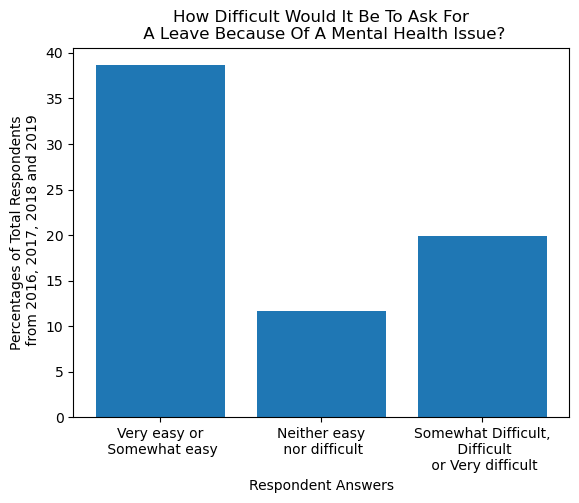

In [22]:
# plot totals of leave of absence ease
#leave_total = [pct_veasy_leave, pct_seasy_leave, pct_neither_leave, pct_diff_leave, pct_sdiff_leave, pct_vdiff_leave]
#answers = ['Very easy', 'Somewhat easy', 'Neither easy nor difficult', 'Difficult', 'Somewhat difficult', 'Very difficult']
leave_total = [pct_easy_tendency, pct_neither_leave, pct_diff_tendency]
answers = ['Very easy or\n Somewhat easy', 'Neither easy\n nor difficult', 'Somewhat Difficult,\n Difficult\n or Very difficult']

x_axis = np.arange(len(answers))

plt.bar(x_axis, leave_total) 

plt.xticks(x_axis, answers) 

#plt.xticks(x_axis, answers, rotation='vertical') 
plt.title('How Difficult Would It Be To Ask For\n A Leave Because Of A Mental Health Issue?')
plt.xlabel("Respondent Answers")
plt.ylabel("Percentages of Total Respondents\n from 2016, 2017, 2018 and 2019")

# Save an image of the chart in Resources
plt.savefig("Figures/leave_comfort_total_bar.png")

plt.show()

In [23]:
# Look at a bar chart for comfort asking for a leave of absence
['Very easy', 'Somewhat easy', 'Neither easy nor difficult',
       'No Response', 'Very difficult', 'Somewhat difficult',
       "I don't know", 'Difficult']
df_2016['request_med_leave'].unique()


array(['Very easy', 'Somewhat easy', 'Neither easy nor difficult',
       'No Response', 'Very difficult', 'Somewhat difficult',
       "I don't know"], dtype=object)

In [24]:
total_ids_2016 = len(df_2016)
print(total_ids_2016)

veasy_leave_2016 = df_2016[(df_2016['request_med_leave'] == 'Very easy')].count()['individual']
pct_veasy_leave_2016 = round(veasy_leave_2016 / total_ids_2016 * 100, 2)
print(pct_veasy_leave_2016)

seasy_leave_2016 = df_2016[(df_2016['request_med_leave'] == 'Somewhat easy')].count()['individual']
pct_seasy_leave_2016 = round(seasy_leave_2016 / total_ids_2016 * 100, 2)
print(pct_seasy_leave_2016)

neither_leave_2016 = df_2016[(df_2016['request_med_leave'] == 'Neither easy nor difficult')].count()['individual']
pct_neither_leave_2016 = round(neither_leave_2016 / total_ids_2016 * 100, 2)
print(pct_neither_leave_2016)

diff_leave_2016 = df_2016[(df_2016['request_med_leave'] == 'Difficult')].count()['individual']
pct_diff_leave_2016 = round(diff_leave_2016 / total_ids_2016 * 100, 2)
print(pct_diff_leave_2016)
print(diff_leave_2016)

sdiff_leave_2016 = df_2016[(df_2016['request_med_leave'] == 'Somewhat difficult')].count()['individual']
pct_sdiff_leave_2016 = round(sdiff_leave_2016 / total_ids_2016 * 100, 2)
print(pct_sdiff_leave_2016)

vdiff_leave_2016 = df_2016[(df_2016['request_med_leave'] == 'Very difficult')].count()['individual']
pct_vdiff_leave_2016 = round(vdiff_leave_2016 / total_ids_2016 * 100, 2)
print(pct_vdiff_leave_2016)

########
easy_tendency_2016 = veasy_leave_2016 + seasy_leave_2016
pct_easy_tendency_2016 = round(easy_tendency_2016 / total_ids_2016 * 100, 2)
print(pct_easy_tendency_2016)

diff_tendency_2016 = diff_leave_2016 + sdiff_leave_2016 + vdiff_leave_2016
pct_diff_tendency_2016 = round(diff_tendency_2016 / total_ids_2016 * 100, 2)
print(pct_diff_tendency_2016)

1428
15.41
19.54
12.46
0.0
0
13.87
8.26
34.94
22.13


In [25]:
total_ids_2017 = len(df_2017)
print(total_ids_2017)

veasy_leave_2017 = df_2017[(df_2017['request_med_leave'] == 'Very easy')].count()['individual']
pct_veasy_leave_2017 = round(veasy_leave_2017 / total_ids_2017 * 100, 2)
print(pct_veasy_leave_2017)

seasy_leave_2017 = df_2017[(df_2017['request_med_leave'] == 'Somewhat easy')].count()['individual']
pct_seasy_leave_2017 = round(seasy_leave_2017 / total_ids_2017 * 100, 2)
print(pct_seasy_leave_2017)

neither_leave_2017 = df_2017[(df_2017['request_med_leave'] == 'Neither easy nor difficult')].count()['individual']
pct_neither_leave_2017 = round(neither_leave_2017 / total_ids_2017 * 100, 2)
print(pct_neither_leave_2017)

diff_leave_2017 = df_2017[(df_2017['request_med_leave'] == 'Difficult')].count()['individual']
pct_diff_leave_2017 = round(diff_leave_2017 / total_ids_2017 * 100, 2)
print(pct_diff_leave_2017)
print(diff_leave_2017)

sdiff_leave_2017 = df_2017[(df_2017['request_med_leave'] == 'Somewhat difficult')].count()['individual']
pct_sdiff_leave_2017 = round(sdiff_leave_2017 / total_ids_2017 * 100, 2)
print(pct_sdiff_leave_2017)

vdiff_leave_2017 = df_2017[(df_2017['request_med_leave'] == 'Very difficult')].count()['individual']
pct_vdiff_leave_2017 = round(vdiff_leave_2017 / total_ids_2017 * 100, 2)
print(pct_vdiff_leave_2017)

########
easy_tendency_2017 = veasy_leave_2017 + seasy_leave_2017
pct_easy_tendency_2017 = round(easy_tendency_2017 / total_ids_2017 * 100, 2)
print(pct_easy_tendency_2017)

diff_tendency_2017 = diff_leave_2017 + sdiff_leave_2017 + vdiff_leave_2017
pct_diff_tendency_2017 = round(diff_tendency_2017 / total_ids_2017 * 100, 2)
print(pct_diff_tendency_2017)

754
19.1
21.75
13.53
7.56
57
9.42
0.0
40.85
16.98


In [26]:
total_ids_2018 = len(df_2018)
print(total_ids_2018)

veasy_leave_2018 = df_2018[(df_2018['request_med_leave'] == 'Very easy')].count()['individual']
pct_veasy_leave_2018 = round(veasy_leave_2018 / total_ids_2018 * 100, 2)
print(pct_veasy_leave_2018)

seasy_leave_2018 = df_2018[(df_2018['request_med_leave'] == 'Somewhat easy')].count()['individual']
pct_seasy_leave_2018 = round(seasy_leave_2018 / total_ids_2018 * 100, 2)
print(pct_seasy_leave_2018)

neither_leave_2018 = df_2018[(df_2018['request_med_leave'] == 'Neither easy nor difficult')].count()['individual']
pct_neither_leave_2018 = round(neither_leave_2018 / total_ids_2018 * 100, 2)
print(pct_neither_leave_2018)

diff_leave_2018 = df_2018[(df_2018['request_med_leave'] == 'Difficult')].count()['individual']
pct_diff_leave_2018 = round(diff_leave_2018 / total_ids_2018 * 100, 2)
print(pct_diff_leave_2018)
print(diff_leave_2018)

sdiff_leave_2018 = df_2018[(df_2018['request_med_leave'] == 'Somewhat difficult')].count()['individual']
pct_sdiff_leave_2018 = round(sdiff_leave_2018 / total_ids_2018 * 100, 2)
print(pct_sdiff_leave_2018)

vdiff_leave_2018 = df_2018[(df_2018['request_med_leave'] == 'Very difficult')].count()['individual']
pct_vdiff_leave_2018 = round(vdiff_leave_2018 / total_ids_2018 * 100, 2)
print(pct_vdiff_leave_2018)

########
easy_tendency_2018 = veasy_leave_2018 + seasy_leave_2018
pct_easy_tendency_2018 = round(easy_tendency_2018 / total_ids_2018 * 100, 2)
print(pct_easy_tendency_2018)

diff_tendency_2018 = diff_leave_2018 + sdiff_leave_2018 + vdiff_leave_2018
pct_diff_tendency_2018 = round(diff_tendency_2018 / total_ids_2018 * 100, 2)
print(pct_diff_tendency_2018)

417
17.27
26.14
7.91
8.63
36
9.35
0.0
43.41
17.99


In [27]:
total_ids_2019 = len(df_2019)
print(total_ids_2019)

veasy_leave_2019 = df_2019[(df_2019['request_med_leave'] == 'Very easy')].count()['individual']
pct_veasy_leave_2019 = round(veasy_leave_2019 / total_ids_2019 * 100, 2)
print(pct_veasy_leave_2019)

seasy_leave_2019 = df_2019[(df_2019['request_med_leave'] == 'Somewhat easy')].count()['individual']
pct_seasy_leave_2019 = round(seasy_leave_2019 / total_ids_2019 * 100, 2)
print(pct_seasy_leave_2019)

neither_leave_2019 = df_2019[(df_2019['request_med_leave'] == 'Neither easy nor difficult')].count()['individual']
pct_neither_leave_2019 = round(neither_leave_2019 / total_ids_2019 * 100, 2)
print(pct_neither_leave_2019)

diff_leave_2019 = df_2019[(df_2019['request_med_leave'] == 'Difficult')].count()['individual']
pct_diff_leave_2019 = round(diff_leave_2019 / total_ids_2019 * 100, 2)
print(pct_diff_leave_2019)
print(diff_leave_2019)

sdiff_leave_2019 = df_2019[(df_2019['request_med_leave'] == 'Somewhat difficult')].count()['individual']
pct_sdiff_leave_2019 = round(sdiff_leave_2019 / total_ids_2019 * 100, 2)
print(pct_sdiff_leave_2019)

vdiff_leave_2019 = df_2019[(df_2019['request_med_leave'] == 'Very difficult')].count()['individual']
pct_vdiff_leave_2019 = round(vdiff_leave_2019 / total_ids_2019 * 100, 2)
print(pct_vdiff_leave_2019)

########
easy_tendency_2019 = veasy_leave_2019 + seasy_leave_2019
pct_easy_tendency_2019 = round(easy_tendency_2019 / total_ids_2019 * 100, 2)
print(pct_easy_tendency_2019)

diff_tendency_2019 = diff_leave_2019 + sdiff_leave_2019 + vdiff_leave_2019
pct_diff_tendency_2019 = round(diff_tendency_2019 / total_ids_2019 * 100, 2)
print(pct_diff_tendency_2019)

351
19.66
23.65
8.83
5.41
19
13.96
0.0
43.3
19.37


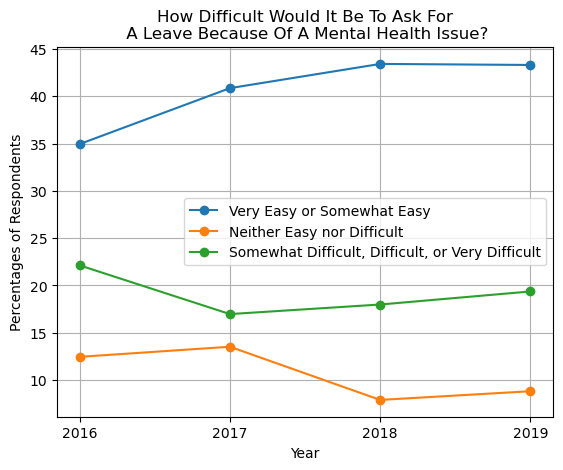

In [28]:
year = [2016, 2017, 2018, 2019]
easy_side = [pct_easy_tendency_2016, pct_easy_tendency_2017, pct_easy_tendency_2018, pct_easy_tendency_2019]  
neutral = [pct_neither_leave_2016, pct_neither_leave_2017, pct_neither_leave_2018, pct_neither_leave_2019]  
diff_side = [pct_diff_tendency_2016, pct_diff_tendency_2017, pct_diff_tendency_2018, pct_diff_tendency_2019]  

x_axis = np.arange(len(year))

easy, = plt.plot(x_axis, easy_side, label="Very Easy or Somewhat Easy", marker='o')
neut, = plt.plot(x_axis, neutral, label="Neither Easy nor Difficult", marker='o' )
diff, = plt.plot(x_axis, diff_side, label="Somewhat Difficult, Difficult, or Very Difficult", marker='o' )

["You can do it","with a string array too"]
#plt.xticks(x_axis, answers, rotation='vertical')
plt.grid()
plt.xticks(x_axis, year) 
plt.title('How Difficult Would It Be To Ask For\n A Leave Because Of A Mental Health Issue?')
plt.xlabel("Year")
plt.ylabel("Percentages of Respondents")
plt.legend(handles=[easy, neut, diff], loc="best")



#plt.plot(x_axis, easy_side)
#plt.plot(x_axis, neutral)
#plt.plot(x_axis, diff_side)

# Save an image of the chart in Resources
plt.savefig("Figures/leave_comfort_timeline.png")

plt.show()

In [31]:
print(pct_easy_tendency_2016 - pct_diff_tendency_2016)
print(pct_easy_tendency_2019 - pct_diff_tendency_2019)

12.809999999999999
23.929999999999996
